Resultados Calculados:
FPR (Taxa de Falsos Positivos): [0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 1.0]
TPR (Taxa de Verdadeiros Positivos): [0.0, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0, 1.0]
Thresholds (Limiar): [inf, 3.0, 2.5, 2.0, 1.0, 0.0, -1.0, -9.0]
Ponto Operacional (FPR, TPR): (np.float64(0.0), np.float64(0.0))
AUC (Área sob a curva): 0.875


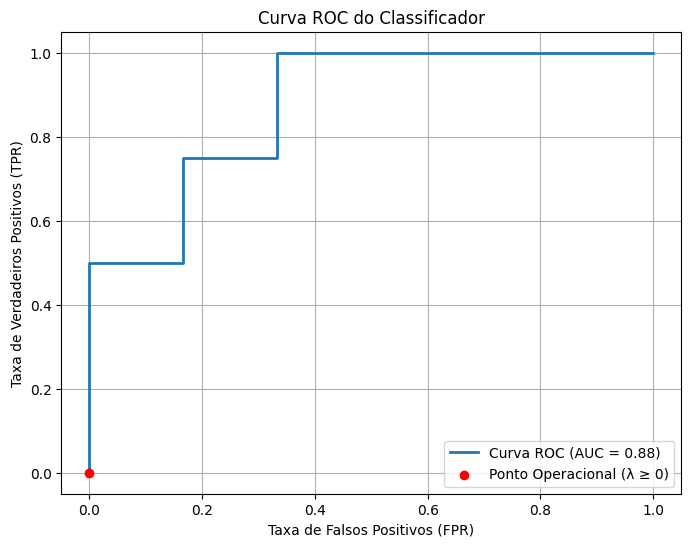

In [1]:
# Importando bibliotecas necessárias
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dados fornecidos
decision_scores = np.array([-9, -2, -7.5, -5, 0, 2, -1, 1, 3, 2.5])  # Decision function
true_labels = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])  # Classes verdadeiras

# 1. Construção da curva ROC
fpr, tpr, thresholds = roc_curve(true_labels, decision_scores)

# 2. Cálculo da AUC (Área Sob a Curva)
roc_auc = auc(fpr, tpr)

# 3. Identificação do ponto operacional (λ = 0)
operational_threshold = 0
idx_operational = np.where(thresholds >= operational_threshold)[0][0]
operational_fpr = fpr[idx_operational]
operational_tpr = tpr[idx_operational]

# Resultados intermediários
results = {
    "FPR (Taxa de Falsos Positivos)": fpr.tolist(),
    "TPR (Taxa de Verdadeiros Positivos)": tpr.tolist(),
    "Thresholds (Limiar)": thresholds.tolist(),
    "Ponto Operacional (FPR, TPR)": (operational_fpr, operational_tpr),
    "AUC (Área sob a curva)": roc_auc
}

# 4. Exibição dos resultados
print("Resultados Calculados:")
for key, value in results.items():
    print(f"{key}: {value}")

# 5. Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})", linewidth=2)
plt.scatter(operational_fpr, operational_tpr, color="red", label="Ponto Operacional (λ ≥ 0)", zorder=5)
plt.title("Curva ROC do Classificador")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend()
plt.grid()
plt.show()
